In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import lib_bbmdev
import logging
from datetime import datetime
import sys
from pathlib import Path

import scipy.signal


%matplotlib inline

In [2]:
#initialize
os.chdir(r'C:\Users\Arcalab_WS\DevelopingToolkit\bbm_run2_tdms')
path = "Data/2023_run2/"
excel_file = "tdms_dataframe_xlsx.xlsx"
df_excel = pd.read_excel(path+excel_file, header=1)
df_stable = df_excel.dropna()
df_stable.set_index("File", inplace = True)
df_stable

,0,Iu,Iv,Iw,A,B,Z,H,SV1,SV2,...,Count,Vu,Vv,Vw,Duration [s],Sampling Frequency [Hz],Low TH,High TH,Target freq [Hz],Is in Spreadsheet?
File,,,,,,,,,,,,,,,,,,,,,
tdms103_room-to-cryo.tdms,4,1,1,1,1,1,1,1,0,0,...,1,1,1,1,9348.000,1000,-0.5,0.5,1.0,Y
tdms104_room-to-cryo.tdms,5,1,1,1,1,1,1,1,0,0,...,1,1,1,1,15217.000,1000,-0.5,0.5,0.8,Y
tdms35_room-to-cryo.tdms,7,1,1,1,1,1,1,1,1,1,...,0,1,1,1,9959.000,1000,-8.0,-0.5,1.0,Y
tdms56_room-to-cryo.tdms,12,1,1,1,1,1,1,1,1,1,...,0,1,1,1,8452.000,1000,-8.0,-0.5,1.0,Y
tdms58_room-to-cryo.tdms,13,1,1,1,1,1,1,1,1,1,...,0,1,1,1,3648.000,1000,-8.0,-0.5,1.0,Y
tdms61_room-to-cryo.tdms,14,1,1,1,1,1,1,1,1,1,...,0,1,1,1,2105.000,1000,-8.0,-0.5,1.0,Y
tdms64_room-to-cryo.tdms,17,1,1,1,1,1,1,1,1,1,...,0,1,1,1,21744.009,1000,-8.0,-0.5,1.0,Y
tdms75_room-to-cryo.tdms,23,1,1,1,1,1,1,1,0,0,...,1,1,1,1,11302.000,1000,-0.5,0.5,1.0,Y
tdms88_room-to-cryo.tdms,29,1,1,1,1,1,1,1,0,0,...,1,1,1,1,11054.000,1000,-0.5,0.5,1.0,Y


In [3]:
os.chdir(r'C:\Users\Arcalab_WS\DevelopingToolkit\bbm_run2_tdms')
filename = "tdms103_room-to-cryo.tdms"
# here, choose one of the tdms files with target frequency of one hertz for which all encoders are working, 
#such files are number 103, 61, 75, 88, 89, 90, 96.



created_directory = lib_bbmdev.create_directory('C:/Users/Arcalab_WS/DevelopingToolkit/bbm_run2_tdms/Data/2023_run2/encoder_data/'+filename+'_encoder')

df_signal = lib_bbmdev.tdms_load_selected_custom(path + 'tdms/'+filename , samplerate=1000, print_=True)
os.chdir(created_directory)
df_signal

Directory 'C:/Users/Arcalab_WS/DevelopingToolkit/bbm_run2_tdms/Data/2023_run2/encoder_data/tdms103_room-to-cryo.tdms_encoder' already exists.


,time,Iu,Iv,Iw,A,B,Z,H,Count,Vu,Vv,Vw
0,0.000,-0.001192,0.005260,0.007852,1.104498,-10.375581,-0.898934,0.112319,-10.380818,0.002865,0.002850,0.008128
1,0.001,-0.000872,0.004944,0.007214,1.104817,-10.375581,-0.947625,0.112002,-10.380818,-0.012568,-0.012584,0.002983
2,0.002,-0.000872,0.004312,0.007533,1.104179,-10.375581,-0.977540,0.114533,-10.380818,0.002865,-0.002294,-0.002161
3,0.003,-0.001511,0.005576,0.007214,1.105135,-10.375581,-0.977222,0.113268,-10.380818,0.002865,-0.002294,0.002983
4,0.004,-0.000872,0.004312,0.007214,1.104817,-10.375581,-0.939669,0.112951,-10.380818,-0.002279,-0.002294,0.002983
...,...,...,...,...,...,...,...,...,...,...,...,...
9347995,9347.995,-0.001192,0.005260,0.004026,1.092379,0.532175,-0.539319,0.111054,0.000360,-0.002279,0.007995,0.002983
9347996,9347.996,-0.001192,0.004628,0.004026,1.092061,0.530911,-0.535819,0.111370,-0.001222,-0.002279,0.002850,-0.007306
9347997,9347.997,-0.000872,0.004944,0.004026,1.092061,0.528068,-0.538365,0.111054,-0.000905,-0.007424,0.002850,-0.007306
9347998,9347.998,-0.000872,0.004628,0.004664,1.092379,0.530595,-0.553004,0.111686,-0.000905,-0.007424,-0.002294,-0.007306


Stability zone goes from index 7281304 to index 8820001.
1.004363069 1.0981196690000001
0.188178319 1.0972895930000002
-1.6856306620000001 1.096449644
[[0.95414491555, 1.1530256524500002], [0.17876940305, 1.1521540726500001], [-1.7699121951, 1.1512721262]]


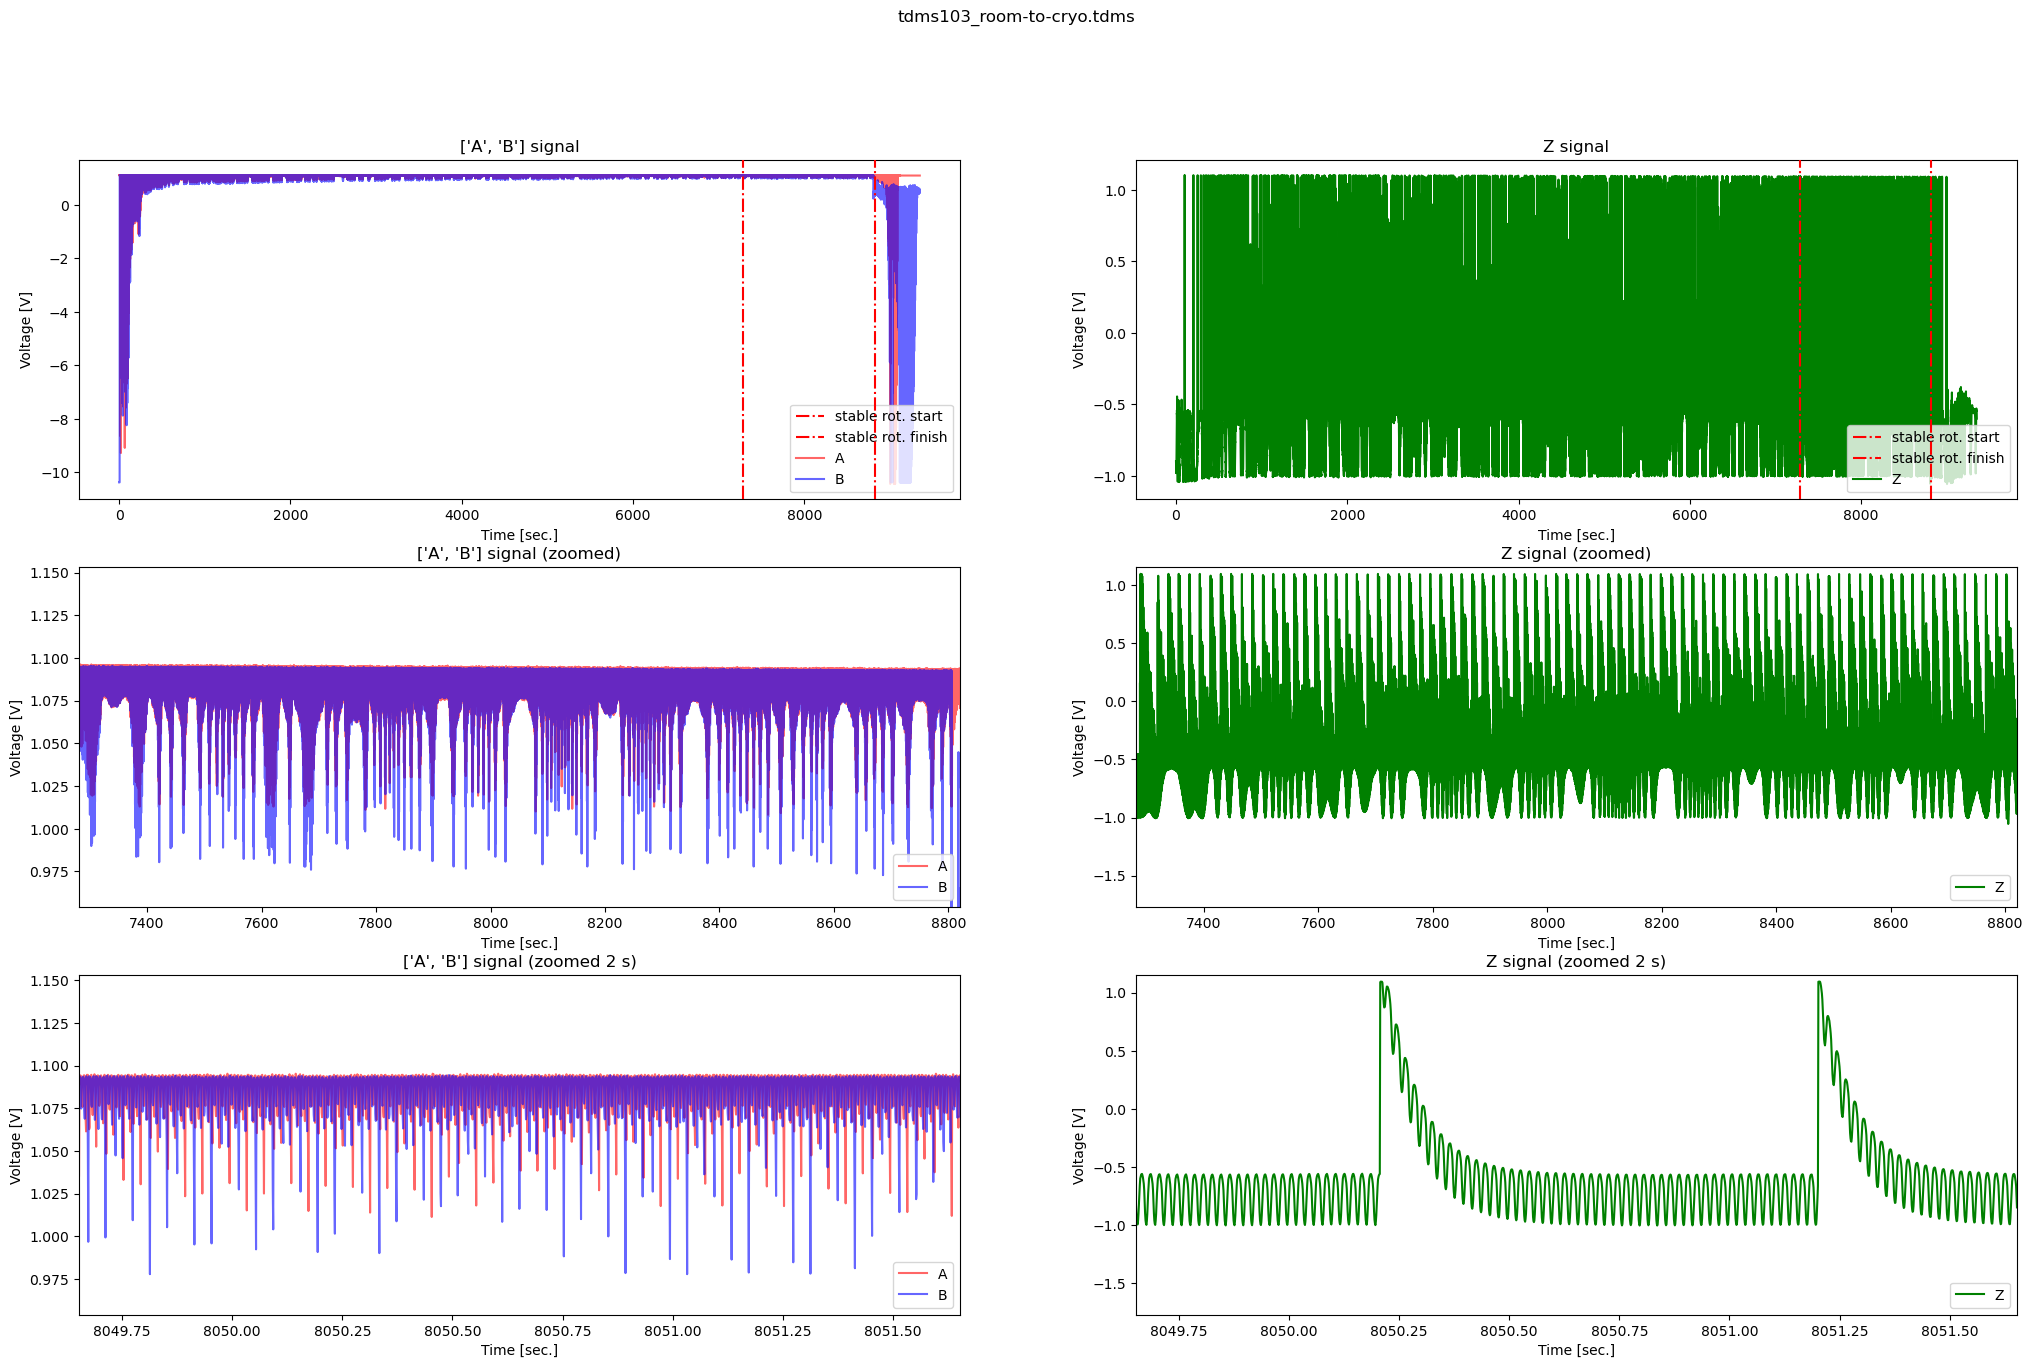

In [4]:
low_th, high_th, target_freq = df_stable.loc[filename, ['Low TH', 'High TH', 'Target freq [Hz]']]
threshold,time_stamps=lib_bbmdev.triggerd_window(df_signal['Z'].to_numpy(),df_signal['time'].to_numpy(),high_threshold=high_th,low_threshold=low_th,window_size=2)
period,freq=lib_bbmdev.time2freq(time_stamps)

try:
    if target_freq == 0.8:
        stable_index = np.where((freq>0.955*target_freq)&(freq<1.01*target_freq))[0]
    else:
        stable_index = np.where((freq>target_freq)&(freq<1.01*target_freq))[0]
    stable_str = time_stamps[1:][stable_index[0]]
    stable_fin = time_stamps[1:][stable_index[-1]]
except:
    stable_str = np.inf
    stable_fin = np.inf



limA, limB, limZ = lib_bbmdev.stability_zone_zoom([df_signal['A'],df_signal['B'],df_signal['Z']], df_signal['time'], stable_str, stable_fin, margin = 0.05, print_=True)
sta, fin = lib_bbmdev.stability_zone_start_end(df_signal['time'], stable_str, stable_fin, print_ = False)

sr = 100
sec_windowAB, sec_windowZ = 2, 2
y_data = df_signal['A'][::sr], df_signal['B'][::sr], df_signal['Z'][::sr]

y_data_zoom = df_signal['A'][::], df_signal['B'][::], df_signal['Z'][::]

x_data = df_signal['time'][::sr]
x_data_zoom = df_signal['time'][::]
fig, axs = plt.subplots(3,2, figsize=(25,15))
plot_data = list(y_data)
plot_data_zoom = list(y_data_zoom)
plot_labels = ["A", "B", "Z"]
plot_col = ["r", "b", "g"]

#first row
# Call the function with common time_data, multiple data arrays, and specified colors
axs[0,0].axvline(x = stable_str,c = 'r',ls='-.',label = 'stable rot. start', zorder=10) # vertical line at the start
axs[0,0].axvline(x = stable_fin,c = 'r',ls='-.',label = 'stable rot. finish', zorder=10) # vertical line at the finish
lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[0,0],
    x_data,
    plot_data[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha = 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[0,0], "Time [sec.]", "Voltage [V]")
axs[0,0].autoscale(enable=True, axis="x", tight=False)
axs[0,0].autoscale(enable=True, axis="y", tight=False)
axs[0,0].set_title(f'{plot_labels[0:2]} signal')
axs[0,0].legend(loc="lower right")

axs[0,1].axvline(x = stable_str,c = 'r',ls='-.',label = 'stable rot. start', zorder=10) # vertical line at the start
axs[0,1].axvline(x = stable_fin,c = 'r',ls='-.',label = 'stable rot. finish', zorder=10) # vertical line at the finish
lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[0,1],
    x_data,
    [plot_data[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[0,1], "Time [sec.]", "Voltage [V]")
axs[0,1].autoscale(enable=True, axis="x", tight=False)
axs[0,1].autoscale(enable=True, axis="y", tight=False)
axs[0,1].set_title(f'{plot_labels[2]} signal')
axs[0,1].legend(loc="lower right")


#second row 

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[1,0],
    x_data,
    plot_data[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha = 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[1,0], "Time [sec.]", "Voltage [V]")
axs[1,0].autoscale(enable=True, axis="x", tight=False)
axs[1,0].autoscale(enable=True, axis="y", tight=False)
axs[1,0].set_ylim(limA)
axs[1,0].set_title(f'{plot_labels[0:2]} signal (zoomed)')
axs[1,0].set_xlim(stable_str, stable_fin)
axs[1,0].legend(loc="lower right")

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[1,1],
    x_data,
    [plot_data[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[1,1], "Time [sec.]", "Voltage [V]")
axs[1,1].autoscale(enable=True, axis="x", tight=False)
axs[1,1].autoscale(enable=True, axis="y", tight=False)
axs[1,1].set_ylim(limZ)
axs[1,1].set_title(f'{plot_labels[2]} signal (zoomed)')
axs[1,1].set_xlim(stable_str, stable_fin)
axs[1,1].legend(loc="lower right")


#third row

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[2,0],
    x_data_zoom,
    plot_data_zoom[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha= 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[2,0], "Time [sec.]", "Voltage [V]")
axs[2,0].autoscale(enable=True, axis="x", tight=False)
axs[2,0].autoscale(enable=True, axis="y", tight=False)
axs[2,0].set_ylim(limA)
axs[2,0].set_title(f'{plot_labels[0:2]} signal (zoomed {sec_windowAB} s)')
axs[2,0].set_xlim((stable_fin+stable_str)/2 - sec_windowAB/2, (stable_fin+stable_str)/2 + sec_windowAB/2)
axs[2,0].legend(loc="lower right")


lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[2,1],
    x_data_zoom,
    [plot_data_zoom[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[2,1], "Time [sec.]", "Voltage [V]")
axs[2,1].autoscale(enable=True, axis="x", tight=False)
axs[2,1].autoscale(enable=True, axis="y", tight=False)
axs[2,1].set_ylim(limZ)
axs[2,1].set_title(f'{plot_labels[2]} signal (zoomed {sec_windowZ} s)')
axs[2,1].set_xlim((stable_fin+stable_str)/2 - sec_windowZ/2, (stable_fin+stable_str)/2 + sec_windowZ/2)
axs[2,1].legend(loc="lower right")

fig.suptitle(filename)
#plt.savefig(
           #"./" + "encoder.jpg",
           #dpi=130,
       #)
plt.show()

In [5]:
low_thA, high_thA = 1.08, 1.09
low_thB, high_thB = 1.08, 1.09
period_accum_Z, period_Z, time_stamps_Z, time_index_Z = lib_bbmdev.freq_calc(df_signal['time'].to_numpy(), df_signal['Z'].to_numpy(), 
                                                                        high_th, low_th)

period_accum_A, period_A, time_stamps_A, time_index_A = lib_bbmdev.freq_calc(df_signal['time'][sta:fin].to_numpy(), df_signal['A'][sta:fin].to_numpy(), 
                                                         high_thA, low_thA)

period_accum_B, period_B, time_stamps_B, time_index_B = lib_bbmdev.freq_calc(df_signal['time'][sta:fin].to_numpy(), df_signal['B'][sta:fin].to_numpy(), 
                                                         high_thB, low_thB)

periodoA,freqA=lib_bbmdev.time2freq(time_stamps_A)
target_freqA = target_freq*128
try:
    if target_freqA == 0.8*128:
        stable_indexA = np.where((freqA>0.955*target_freqA)&(freqA<1.01*target_freqA))[0]
    else:
        stable_indexA = np.where((freqA>target_freqA)&(freqA<1.01*target_freqA))[0]
    stable_strA = time_stamps_A[1:][stable_indexA[0]]
    stable_finA = time_stamps_A[1:][stable_indexA[-1]]
except:
    stable_strA = np.inf
    stable_finA = np.inf


periodoB,freqB=lib_bbmdev.time2freq(time_stamps_B)
target_freqB = target_freq*128
try:
    if target_freqB == 0.8*128:
        stable_indexB = np.where((freqB>0.955*target_freqB)&(freqB<1.01*target_freqB))[0]
    else:
        stable_indexB = np.where((freqB>target_freqB)&(freqB<1.01*target_freqB))[0]
    stable_strB = time_stamps_B[1:][stable_indexB[0]]
    stable_finB = time_stamps_B[1:][stable_indexB[-1]]
except:
    stable_strB = np.inf
    stable_finB = np.inf


periodoZ,freqZ=lib_bbmdev.time2freq(time_stamps_Z)
target_freqZ = target_freq
try:
    if target_freqZ == 0.8:
        stable_indexZ = np.where((freqZ>0.955*target_freqZ)&(freqZ<1.01*target_freqZ))[0]
    else:
        stable_indexZ = np.where((freqZ>target_freqZ)&(freqZ<1.01*target_freqZ))[0]
    stable_strZ = time_stamps_Z[1:][stable_indexZ[0]]
    stable_finZ = time_stamps_Z[1:][stable_indexZ[-1]]
except:
    stable_strZ = np.inf
    stable_finZ = np.inf



Calculating rotation frequency...: 100%|██████████| 1538696/1538696 [00:01<00:00, 1319337.85it/s]


In [6]:
df_stable_rot = df_signal[sta:fin] #stable rotation subportion
df_stable_rot

,time,Iu,Iv,Iw,A,B,Z,H,Count,Vu,Vv,Vw
7281304,7281.304,-0.035045,0.271701,-0.228391,1.095887,1.091288,0.101622,0.112319,-10.380818,-1.617620,1.458759,0.538019
7281305,7281.305,-0.094768,0.288136,-0.185669,1.095887,1.078021,1.094858,0.116114,-10.380818,-1.622765,1.252977,1.011320
7281306,7281.306,-0.151616,0.290981,-0.131789,1.093974,1.077073,1.095495,0.112319,-10.380818,-1.633054,0.887714,1.309705
7281307,7281.307,-0.201438,0.278970,-0.070577,1.087596,1.087813,1.095177,0.113268,-10.380818,-1.607332,0.383547,1.489766
7281308,7281.308,-0.241359,0.253053,-0.005538,1.073564,1.093815,1.094858,0.113268,-10.380818,-1.540454,-0.187498,1.566934
...,...,...,...,...,...,...,...,...,...,...,...,...
8819996,8819.996,0.268039,-0.044678,-0.213406,1.091423,0.327483,-0.949853,0.115798,-10.380818,0.023443,1.551361,-1.596980
8819997,8819.997,0.240892,0.021379,-0.251345,1.081218,0.317059,-0.991224,0.112319,-10.380818,-0.537297,1.592518,-1.494088
8819998,8819.998,0.201290,0.084592,-0.274938,1.065592,0.327799,-1.012865,0.112951,-10.380818,-1.010581,1.618240,-1.272872
8819999,8819.999,0.147636,0.147488,-0.284821,1.058895,0.332221,-1.013183,0.112951,-10.380818,-1.324390,1.623385,-0.902462


In [97]:
# filter parameters

dim = 3 # dimension of the state vector, 2 means position and velocity, 3 means position, velocity and acceleration

e_theta, e_theta_dot, e_theta_ddot = 2*np.pi/512, 0.006*(2*np.pi), 0*5e-6 # Assumed error on initial guess

theta_dot_noise, theta_ddot_noise, theta_dddot_noise = 1e-7, 1e-3, 1e-7 # process noises 

#measurements vector
measurements = np.array([df_stable_rot['Z'].to_numpy(), df_stable_rot['A'].to_numpy(), df_stable_rot['B'].to_numpy()]).T

theta_dot_var, theta_ddot_var, theta_dddot_var = theta_dot_noise**2, theta_ddot_noise**2, theta_dddot_noise**2

e_theta_var, e_theta_dot_var, e_theta_ddot_var = e_theta**2, e_theta_dot**2, e_theta_ddot**2

sigma_noise = 2*np.pi/512/3 # measurement noise, it is the amplitude of the signal peak (maximum error, 3 sigma) divided by three
R = np.diag([sigma_noise**2]) # measurement noise matrix (the greater the matrix, the less we trust the measurements / the more noise there is)

if dim == 3:
    F = np.array([[0,1,0],[0,0,1], [0,0,0]]) # dynamics matrix
    Q = np.diag([theta_dot_var, theta_ddot_var, theta_dddot_var]) # process noise matrix
    P = np.diag([e_theta_var, e_theta_dot_var, e_theta_ddot_var]) # initial covariance matrix
    H = np.array([[1,0,0]]) # measurement matrix

elif dim == 2:
    F = np.array([[0,1],[0,0]]) # dynamics matrix
    Q = np.diag([theta_dot_var, theta_ddot_var]) #  process noise matrix
    P = np.diag([e_theta_var, e_theta_dot_var]) #initial covariance matrix
    H = np.array([[1,0]]) # measurement matrix
Ps = []
F=np.matrix(F)
H=np.matrix(H)
S = np.eye(dim)
print(f'Starting run...')
# vectors
theta_vect = [] # vector of KF angular position 
theta_dot_vect = [] # vector of KF angular velocity 
theta_ddot_vect = [] # vector of KF angular acceleration (only if dim = 3)
tempi = [] # vector of time istances 
residuals_vect = [] # vectors of the difference between the measured angle and the propagated angle (KF-propagated first vector, A/B/Z-propagated second vector)
measurements_time, measurements_angle = [], []
# initialize parameters

t = df_stable_rot['time'].to_numpy() # vector to be used as time
start = 0 # first index
duration = len(t)-start-1 # last index
time = t[start]
tf = t[start + duration - 1]
ts = 0.001 # sampling time
i=start
t_int = 1 # index variation between two consecutive steps, keep 1
t_next = t[start+t_int]-t[start] # time between two consecutive steps. Equals to ts if t_int = 1 (with some numerical approximation error at most)
a_th, b_th, z_th = 1.07, 1.07, -0.5 # thresholds for maxima computation
a_max, a_min, b_max, b_min, z_max, z_min = a_th, a_th, b_th, b_th, z_th, z_th
#counters to process data and retrieve frequencies / maximums
z_switch = 1
a_count, b_count = 6, 6
z_count, z_count_mid = 900, 900
t_count = 1
t_boost = 0 # this value takes into account when two maximums are super-imposed
# initial values
theta_h = 0 + e_theta
theta_dot_h = 1*target_freq*2*np.pi + e_theta_dot
theta_ddot_h = 0*9e-04+ e_theta_ddot            
measuring, b_switch = 'z', 1
noise_flag = 0 # if 0 no additional noise is added to the measurements, keep 0
start_flag = 0 # Enables the processing of A/B signals. It turns to 1 after the first Z signal is processed
res_to_plot_ekf = []
times_to_plot = []
while time < tf:
    z1, a1, b1 = measurements[i]
    z2, a2, b2 = measurements[i+1]
    if (a1 > a_max) & (a1 < 10):
        a_max = a1
    if (b1 > b_max) & (b1 < 10):
        b_max = b1
    if (z1 > z_max)& (z1 < 1):
        z_max = z1
    if (a1 < a_min) & (a1 > -10):
        a_min = a1
    if (b1 < b_min) & (b1 > -10):
        b_max = b1
    if (z1 < z_min) & (z1 > -12):
        z_min = z1

    if (i%5000 == 0) & (i!=0):
        a_th = (a_min + a_max)/2# + a_max/40
        b_th = (b_min + b_max)/2# + b_max/40
        z_th = (z_min + z_max)/2 #+ #z_max/40

    # Activate KF if the measurement is a maximum, otherwise just propagate the angle
        
    if (z1 > z2) & (z1 > z_th) & (z_count >=900):
        if start_flag == 0:
            theta_h = 0 + e_theta
        
        start_flag = 1 # Allow to process A/B signal
        measuring = 'z'
        if theta_h >6:
            meas = 2*np.pi + noise_flag*np.random.normal(0, sigma_noise)
        else:
            meas = 0 + noise_flag*np.random.normal(0, sigma_noise)

        
        if start_flag == 1:    
            measurements_angle.append(meas)
            measurements_time.append(time)
            times_to_plot.append(time)
            
        
            # Activate kalman filter
            
            if dim == 3:
                S =F*ts + np.eye(dim) + F*F*ts**2/2
                Qk = Q*ts + F.T*Q*ts**2/2 + (F*F).T*Q*ts**3/6 + F*Q*ts**2/2+ F*Q*F.T*ts**3/3 + F*Q*(F*F).T*ts**4/8 + F*F*Q*ts**3/6 + F*F*Q*F.T*ts**4/8 + F*F*Q*(F*F).T*ts**5/20
            elif dim ==2 :
                S = F*ts + np.eye(dim)
                Qk = Q*ts + (F*Q*ts**2 + Q*F.T*ts**2)/2 + F*Q*F.T*ts**3/3

            M = S*P*S.T + Qk
            Ps.append(P)
            K = M * H.T * ((H*M*H.T+R)**-1)
            P = (np.eye(dim)- K*H)*M
            P = (np.eye(dim)- K*H)*M*((np.eye(dim)- K*H).T) + K*R*K.T
            P = (P + P.T)/2

            # Process the measurements with KF relative to encoder Z
            measure = meas #+ np.random.normal(0, 2*np.pi/512/6)
            if dim == 3:
                state = np.matrix([theta_h, theta_dot_h, theta_ddot_h]).T
            elif dim == 2:
                state = np.matrix([theta_h, theta_dot_h]).T
            model = H*S*state
            residuals = measure - model
            residuals_vect.append(residuals)
            #print(f'ekf residual is {residuals}, z residual is {res_z}')

            # KF correction
            if dim == 3:
                theta_h, theta_dot_h, theta_ddot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0], (theta_ddot_h + K[2,:]*residuals)[0,0]
            elif dim ==2:
                theta_h, theta_dot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0]
            if theta_h >= 2*np.pi:
                theta_h = theta_h - 2*np.pi
            t_count=1


        z_count = 0
        z_switch = 1
        b_switch = 1

    if (a1 > a2) & (a1 > a_th) & (a_count >=6) & (start_flag ==1) & (t_count<512) & (t_count>1):

        if (b1 > b2) & (b1 > b_th)& (b_count >=6):  # mi dice se devo processare questo A o no
            if measuring == 'a': # last measure is A
                t_boost = 0 # I consider that I skipped one A maximum and go on to process B 
                b_switch = 1
            else: # last measure is B or Z
                t_boost = 0 # I process A but taking into account that I skipped one B maximum
                measuring = 'b'
                b_switch = 0 # disable processing on B in the same loop
        if measuring != 'a':
            

            measuring = 'a'

            meas = 2*np.pi*t_count/512 + noise_flag*np.random.normal(0, sigma_noise)
            #print('processing a', time, t_count, meas, theta_h, theta_dot_h)


            # Activate kalman filter 
            if dim == 3:
                S =F*ts + np.eye(dim) + F*F*ts**2/2
                Qk = Q*ts + F.T*Q*ts**2/2 + (F*F).T*Q*ts**3/6 + F*Q*ts**2/2+ F*Q*F.T*ts**3/3 + F*Q*(F*F).T*ts**4/8 + F*F*Q*ts**3/6 + F*F*Q*F.T*ts**4/8 + F*F*Q*(F*F).T*ts**5/20
            elif dim ==2 :
                S = F*ts + np.eye(dim)
                Qk = Q*ts + (F*Q*ts**2 + Q*F.T*ts**2)/2 + F*Q*F.T*ts**3/3

            M = S*P*S.T + Qk
            Ps.append(P)
            K = M * H.T * ((H*M*H.T+R)**-1)
            P = (np.eye(dim)- K*H)*M
            P = (np.eye(dim)- K*H)*M*((np.eye(dim)- K*H).T) + K*R*K.T
            P = (P + P.T)/2

            # Process the measurements with KF relative to encoder A
            measure = meas 
            measurements_angle.append(meas)
            measurements_time.append(time)
          
            if dim == 3:
                state = np.matrix([theta_h, theta_dot_h, theta_ddot_h]).T
            elif dim == 2:
                state = np.matrix([theta_h, theta_dot_h]).T
            model = H*S*state
            residuals = measure - model
            residuals_vect.append(residuals)
    
            #print(f'ekf residual is {residuals}, a residual is {res_a}')

            # KF correction
            if dim == 3:
                theta_h, theta_dot_h, theta_ddot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0], (theta_ddot_h + K[2,:]*residuals)[0,0]
            elif dim ==2:
                theta_h, theta_dot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0]
        
            a_count = 0
            t_count+= 1 + t_boost
            a_switch = 1
            t_boost = 0
    if (b1 > b2) & (b1 > b_th)& (b_count >=6) & (start_flag ==1) &  (b_switch == 1):
        #print('b maximum')
        #if measuring == 'b':
            #print('processing two consecutive b', time, t_count)
        if measuring != 'b':
            measuring = 'b'
            meas = 2*np.pi*t_count/512 + noise_flag*np.random.normal(0, sigma_noise)
            if t_count >= 512:
                if theta_h < 1:
                    meas = abs(meas - 2*np.pi)
        
            # Activate kalman filter
            if dim == 3:
                S =F*ts + np.eye(dim) + F*F*ts**2/2
                Qk = Q*ts + F.T*Q*ts**2/2 + (F*F).T*Q*ts**3/6 + F*Q*ts**2/2+ F*Q*F.T*ts**3/3 + F*Q*(F*F).T*ts**4/8 + F*F*Q*ts**3/6 + F*F*Q*F.T*ts**4/8 + F*F*Q*(F*F).T*ts**5/20
            elif dim ==2 :
                S = F*ts + np.eye(dim)
                Qk = Q*ts + (F*Q*ts**2 + Q*F.T*ts**2)/2 + F*Q*F.T*ts**3/3

            M = S*P*S.T + Qk
            Ps.append(P)
            K = M * H.T * ((H*M*H.T+R)**-1)
            P = (np.eye(dim)- K*H)*M
            P = (np.eye(dim)- K*H)*M*((np.eye(dim)- K*H).T) + K*R*K.T
            P = (P + P.T)/2

            # Process the measurements with KF relative to encoder B
            measure = meas 
            if dim == 3:
                state = np.matrix([theta_h, theta_dot_h, theta_ddot_h]).T
            elif dim == 2:
                state = np.matrix([theta_h, theta_dot_h]).T
            model = H*S*state
            residuals = measure - model
            measurements_angle.append(measure)
            measurements_time.append(time)
            residuals_vect.append(residuals)
            #print(f'ekf residual is {residuals}, b residual is {res_b}')

            # KF correction
            if dim == 3:
                theta_h, theta_dot_h, theta_ddot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0], (theta_ddot_h + K[2,:]*residuals)[0,0]
            elif dim ==2:
                theta_h, theta_dot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0]
            t_count+=3 + t_boost
            b_count = 0
            t_boost = 0
    z_count+=1
    z_count_mid+=1
    a_count += 1
    b_count+=1
    if start_flag == 1:
        theta_vect.append(theta_h)
        theta_dot_vect.append(theta_dot_h)
        if dim == 3:
            theta_ddot_vect.append(theta_ddot_h)
        tempi.append(time)

    # Propagation/prediction using KF
    if dim ==3:
        theta_ddot_vect.append(theta_ddot_h)
        state = np.matrix([theta_h, theta_dot_h, theta_ddot_h]).T
        new_state = S*state
        theta_h, theta_dot_h, theta_ddot_h = new_state[0,0], new_state[1,0], new_state[2,0]
    elif dim == 2:
        state = np.matrix([theta_h, theta_dot_h]).T
        new_state = S*state
        theta_h, theta_dot_h = new_state[0,0], new_state[1,0]

    # Reset the angles if greater than 2*pi
    if theta_h > 2*np.pi:
        theta_h = theta_h - 2*np.pi
    
    # Go forward in time
    i+=t_int
    time = time+t_next
    if i%1000 == 0:
        print(f'Iteration {i} completed.')    

print('Run completed.')

Starting run...
Iteration 1000 completed.
Iteration 2000 completed.
Iteration 3000 completed.
Iteration 4000 completed.
Iteration 5000 completed.
Iteration 6000 completed.
Iteration 7000 completed.
Iteration 8000 completed.
Iteration 9000 completed.
Iteration 10000 completed.
Iteration 11000 completed.
Iteration 12000 completed.
Iteration 13000 completed.
Iteration 14000 completed.
Iteration 15000 completed.
Iteration 16000 completed.
Iteration 17000 completed.
Iteration 18000 completed.
Iteration 19000 completed.
Iteration 20000 completed.
Iteration 21000 completed.
Iteration 22000 completed.
Iteration 23000 completed.
Iteration 24000 completed.
Iteration 25000 completed.
Iteration 26000 completed.
Iteration 27000 completed.
Iteration 28000 completed.
Iteration 29000 completed.
Iteration 30000 completed.
Iteration 31000 completed.
Iteration 32000 completed.
Iteration 33000 completed.
Iteration 34000 completed.
Iteration 35000 completed.
Iteration 36000 completed.
Iteration 37000 compl

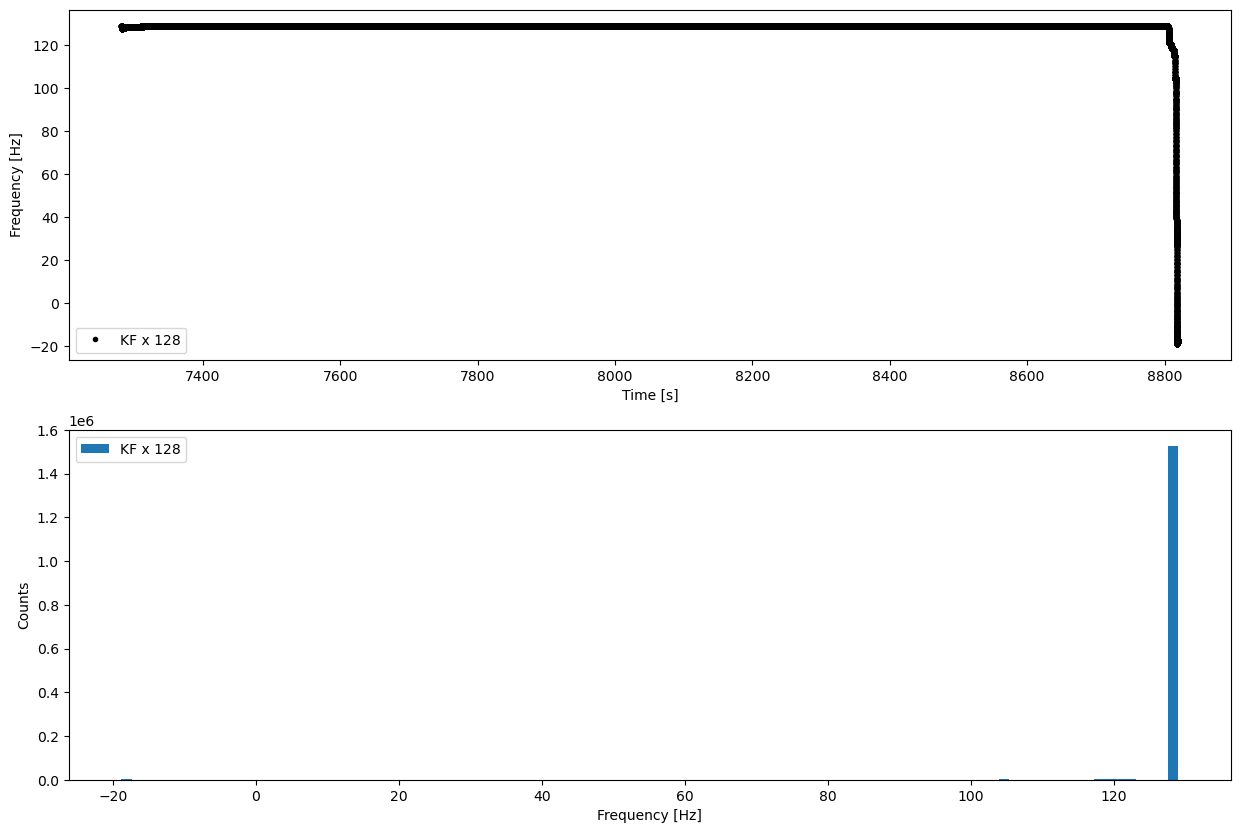

In [98]:
fig = plt.figure(figsize=[15,10])
plt.subplot(211)

plt.plot(tempi, 128*np.array(theta_dot_vect)/(2*np.pi), 'k.', label = 'KF x 128', alpha = 1)
plt.xlabel('Time [s]')
plt.ylabel("Frequency [Hz]")
plt.legend()
plt.subplot(212)
plt.hist(128*np.array(theta_dot_vect)/(2*np.pi), bins = 100,density = False,label=['KF x 128'])

plt.ylabel('Counts')
plt.xlabel("Frequency [Hz]")
plt.legend()
plt.show()

Mean squared residual is 0.4218480551659069 deg, Sqrd Residuals Std. dev. is 0.3272823166516672 deg.
Mean residual is -0.00018139480433483884 deg, Residuals Std. dev. is 0.649498285033788 deg.


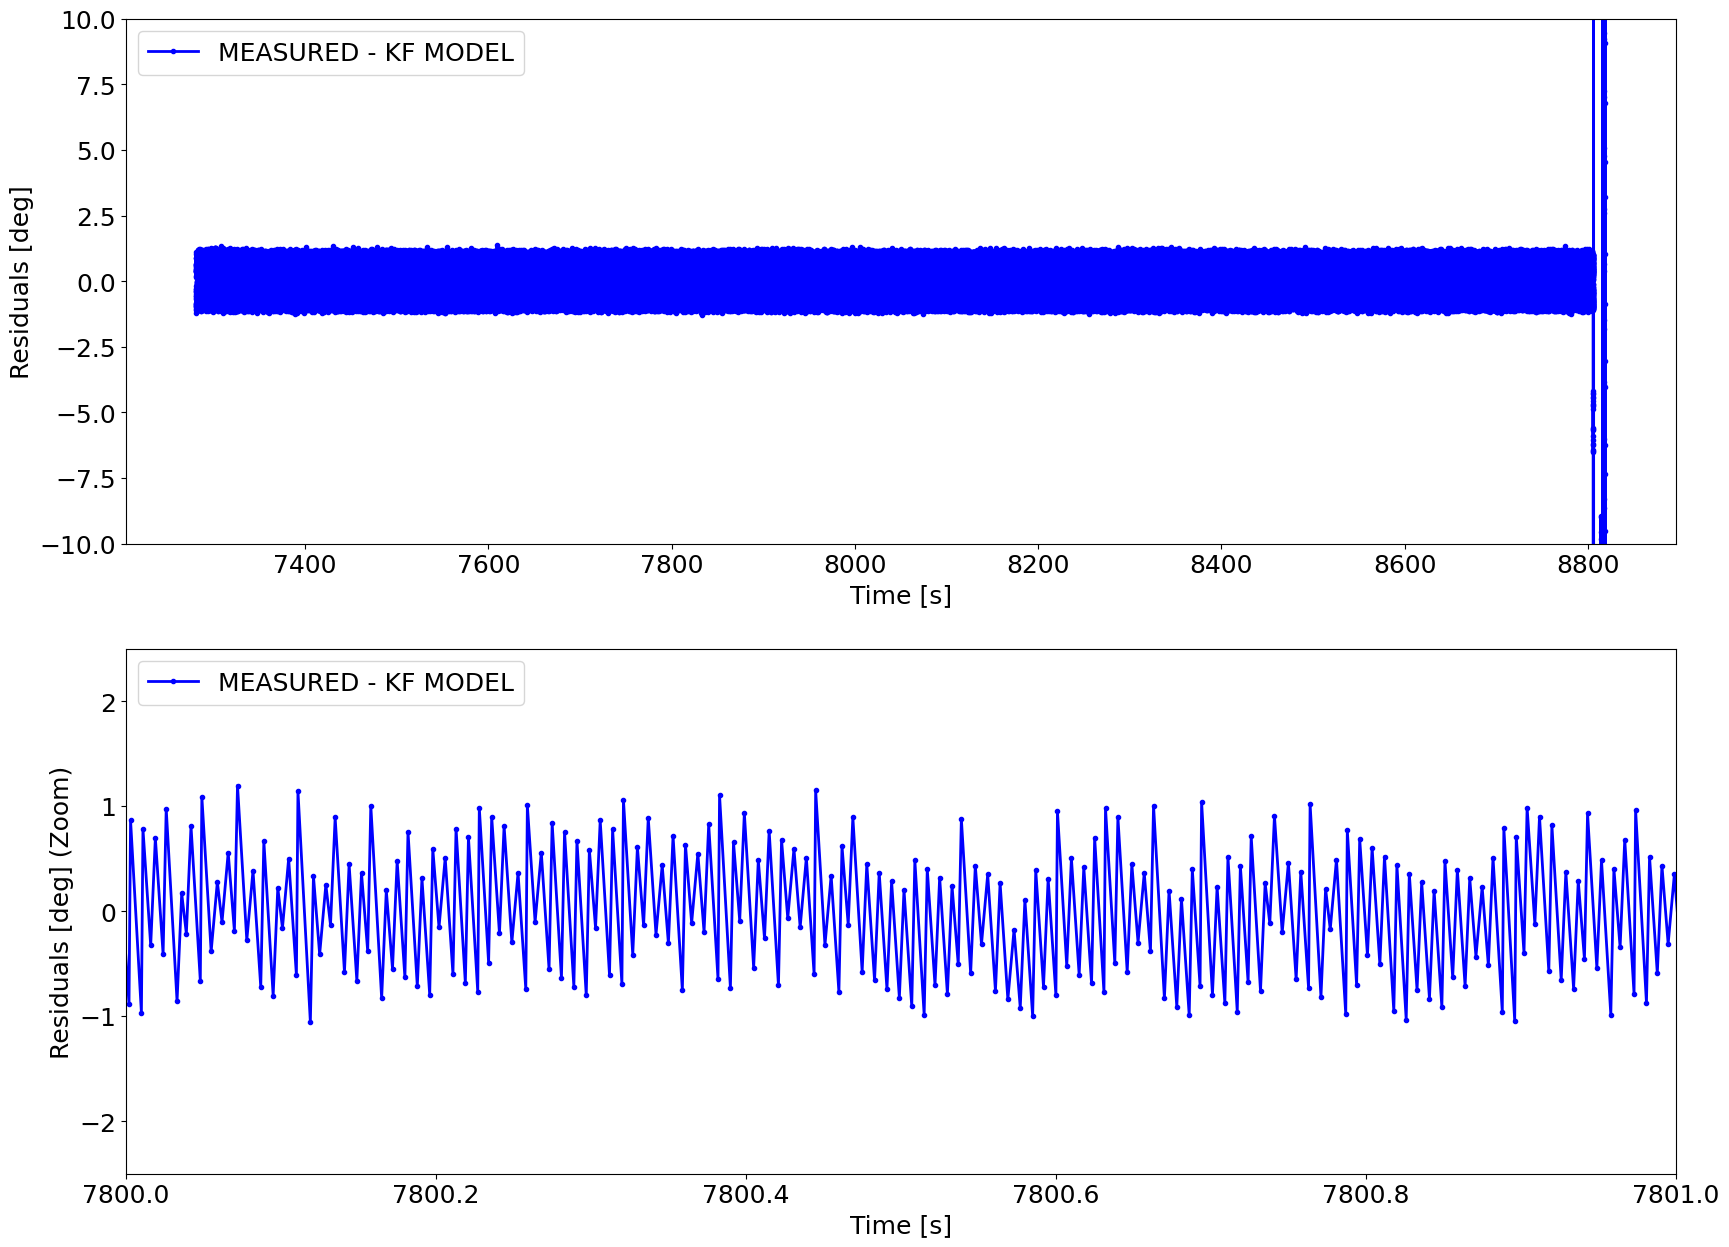

In [99]:
stat_range_start, stat_range_end = 25000, 370000 #select a range beginning after the KF has terminated the transitory phase and before the very end of the run
mean_residual_rad = np.mean(np.array(residuals_vect[stat_range_start:stat_range_end]))
mean_residual_deg = np.mean(np.array(residuals_vect[stat_range_start:stat_range_end])*180/np.pi)
mean_squared_residual_rad = np.mean((np.array(residuals_vect[stat_range_start:stat_range_end]))**2)
mean_squared_residual_deg = np.mean((np.array(residuals_vect[stat_range_start:stat_range_end])*180/np.pi)**2)
std_squared_residual_deg = np.std((np.array(residuals_vect[stat_range_start:stat_range_end])*180/np.pi)**2)
std_residual_deg = np.std(np.array(residuals_vect[stat_range_start:stat_range_end])*180/np.pi)

print(f'Mean squared residual is {mean_squared_residual_deg} deg, Sqrd Residuals Std. dev. is {std_squared_residual_deg} deg.')
print(f'Mean residual is {mean_residual_deg} deg, Residuals Std. dev. is {std_residual_deg} deg.')
fig = plt.figure(figsize=[20,15])
fs = 18
plt.subplot(211)
plt.plot(measurements_time,(np.array(residuals_vect)[:,0,0]*180/np.pi), 'b.-', label ='MEASURED - KF MODEL', linewidth = 2)
plt.xlabel('Time [s]',fontsize = fs)
plt.ylabel("Residuals [deg]",fontsize = fs)
plt.yticks(fontsize = fs)
plt.xticks(fontsize = fs)
plt.legend(fontsize = fs, loc = 'upper left')
plt.ylim([-10,10])
#plt.xlim([7400,8600])
plt.subplot(212)
plt.plot(measurements_time,(np.array(residuals_vect)[:,0,0]*180/np.pi), 'b.-', label ='MEASURED - KF MODEL', linewidth = 2)
plt.xlabel('Time [s]',fontsize = fs)
plt.ylabel("Residuals [deg] (Zoom)",fontsize = fs)
plt.yticks(fontsize = fs)
plt.xticks(fontsize = fs)
plt.legend(fontsize = fs, loc = 'upper left')
plt.ylim([-2.5,2.5]) #adjust y-limits around expected values
plt.xlim([7800,7801]) #performs one second zoom
#plt.axhline(mean_residual_deg)
plt.show()

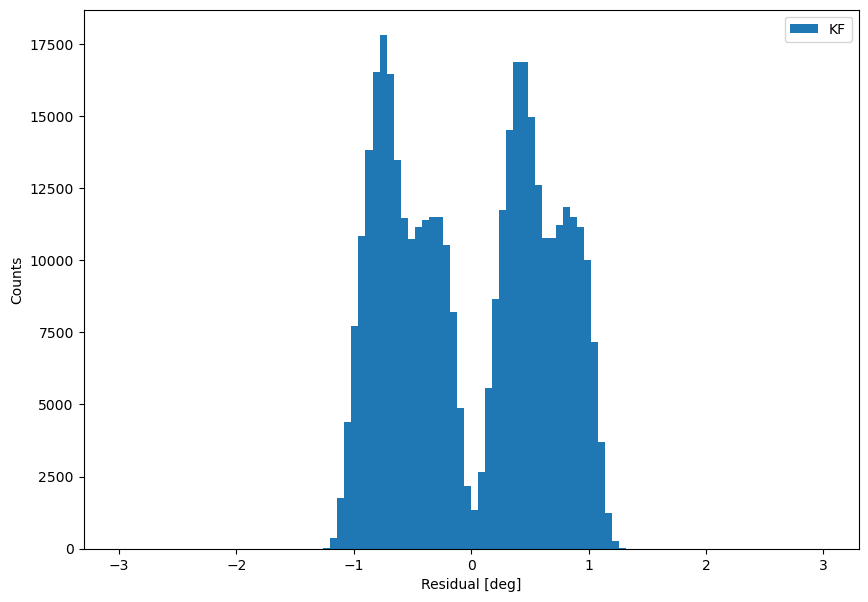

In [100]:
#residuals distribution

fig = plt.figure(figsize=[10,7])

plt.hist(np.array(residuals_vect)[:,0,0]*180/np.pi, range=[-3,3], bins = 100,density = False,label=['KF'])

plt.ylabel('Counts')
plt.xlabel("Residual [deg]")
plt.legend()
plt.show()

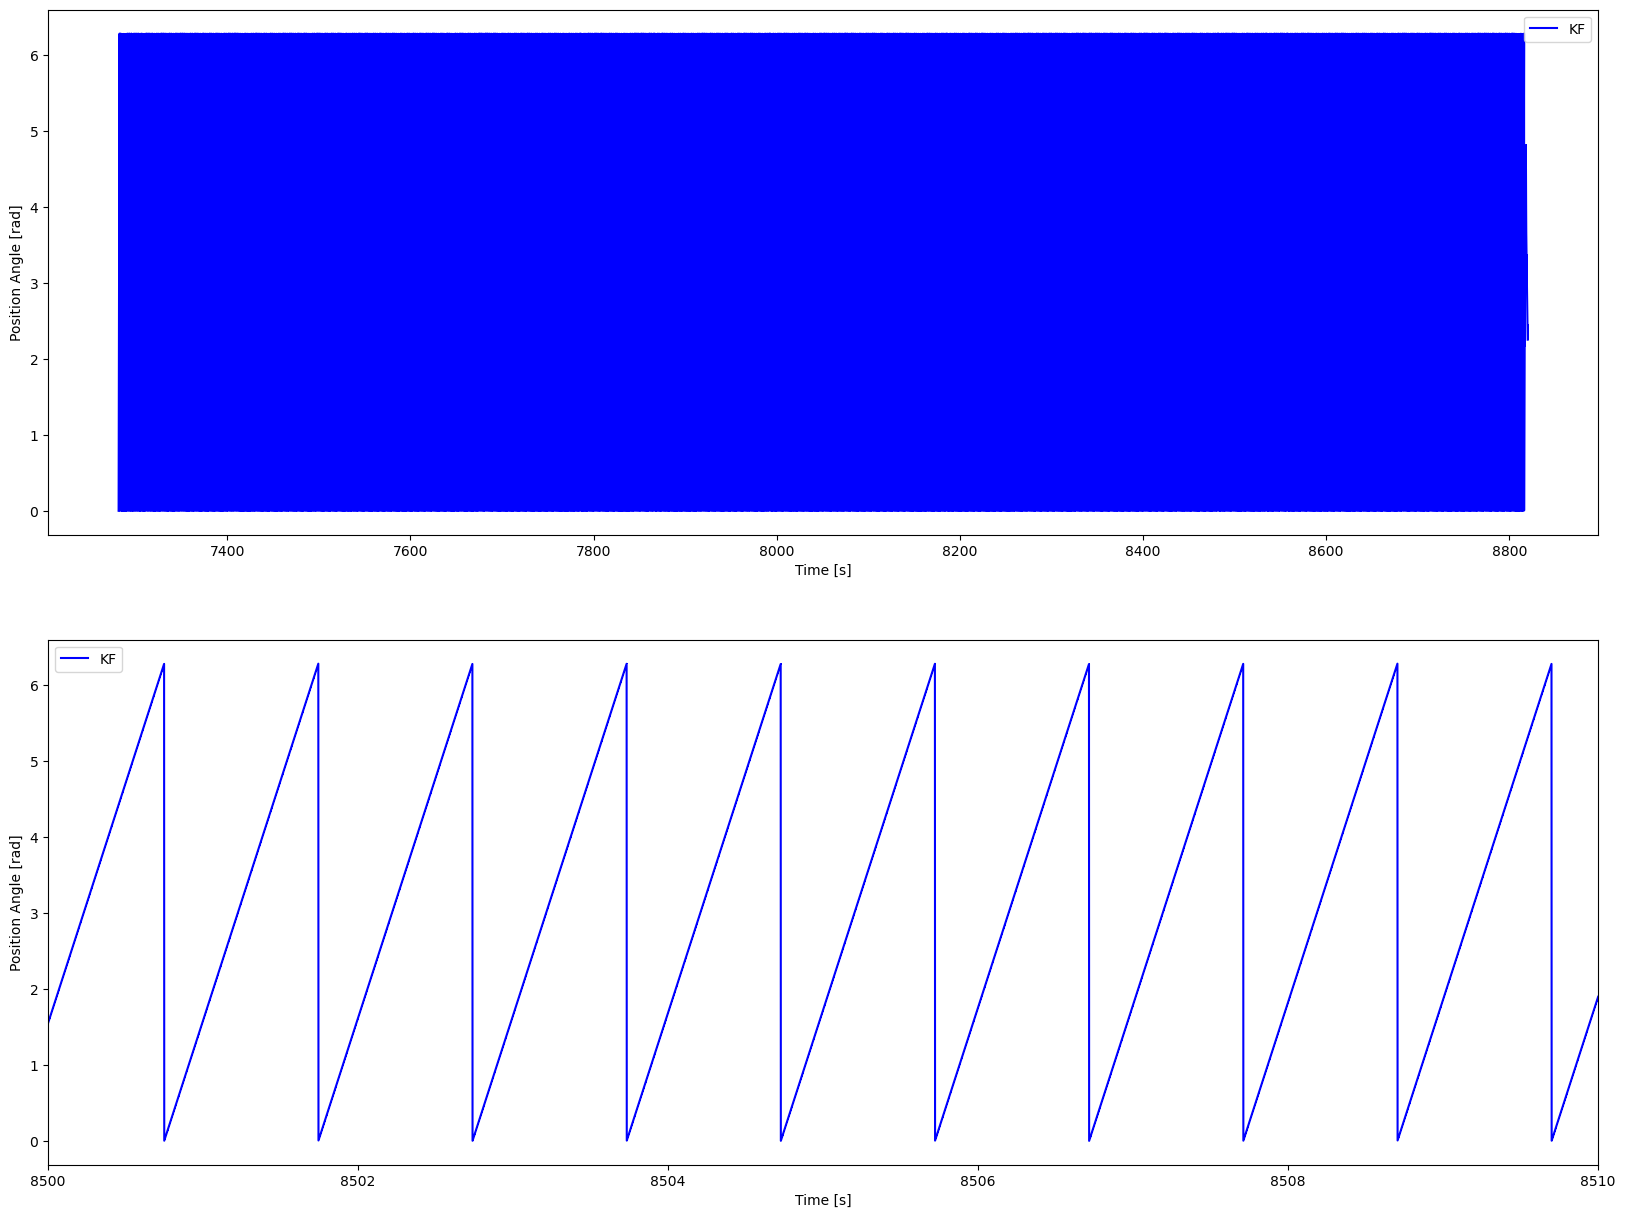

In [89]:
fig = plt.figure(figsize=(20,15))
xmin, xmax = 8500, 8510
plt.subplot(211)
plt.plot(tempi, theta_vect, 'b,-', label = 'KF')

plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Position Angle [rad]')

plt.subplot(212)
plt.plot(tempi, theta_vect, 'b,-', label = 'KF')

plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Position Angle [rad]')
plt.xlim([xmin, xmax])
plt.show()